1) Introduction: Our project's main objective is to predict the relationship between the US Dollar (USD) and Euro (EUR) exchange rates using different machine learning techniques and data exploration methods. By analyzing variables such as market trends (slope), time intervals (legs), and other relevant factors from financial data, we will identify patterns to forecast future currency movements/. We plan to explore different univariate models and time series forecasting, assessing their accuracy through various performance metrics by looking for certain patterns. The results will provide insights into the potential impact of economic factors on currency fluctuations, providing valuable predictions for financial analysts and traders. 

TradingView: https://www.tradingview.com/ \
Look up EURO/US dollar super chart \
Legs Excel: Legs.xlsx \
Misc Excel: Misc.xlsx \
Slopes Excel: Slopes.xlsx \
GitHub link: https://github.com/henok-57/DATA422_2024Fall_Team_3.git

 2) Overview of Data Engineering Efforts: Our group has found the dataset that we will be working with for this project. We have 3 Excel data sets. Legs, Misc, & Slopes. After finding our data our group began the cleaning process. Our group used TradingView to extract data from the 1 hour time chart. The time variable was very essential, and it is important that we correct any mis-inputted variables to ensure structure and accuracy. 

TradingView is already accurate with its data, the only discrepancies would most likely be which forex brokerage you are viewing charts under but even then the data is basically identical. 

However, some variables such as the exponential moving average (EMA) could not be re-measured from a future date, so we removed said rows in order to further clean the data. This piece of the process is very critical since calculations require historical data to make a futuristic prediction. The whole foundation of the EMA relies on past data to calculate a value, so if that data is not accurate, consistent, or missing data points, it would mess up the whole calculation rendering the EMA useless in this situation. This is why our group decided to remove these rows that are skewing our analysis and allowed our dataset to be clean, precise, and accurate. 

In our dataset there were definitely formatting issues that we needed to address. Altering columns, column names, and making sure the data was consistent throughout the 3 different data sets was a crucial step in joining the data together later on. 


3) Data Visualization

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [5]:
#3 univariate charts that explain your response variable and select independent variables used to answer your research question
df_legs = pd.read_excel('Legs.xlsx')
df_misc = pd.read_excel('Misc.xlsx')
df_slopes = pd.read_excel('Slopes.xlsx')

[Text(0.5, 0, 'Leg 1\n Percentage in Point (pip)'),
 Text(0.5, 1.0, 'Density of First Leg of Elliot Wave')]

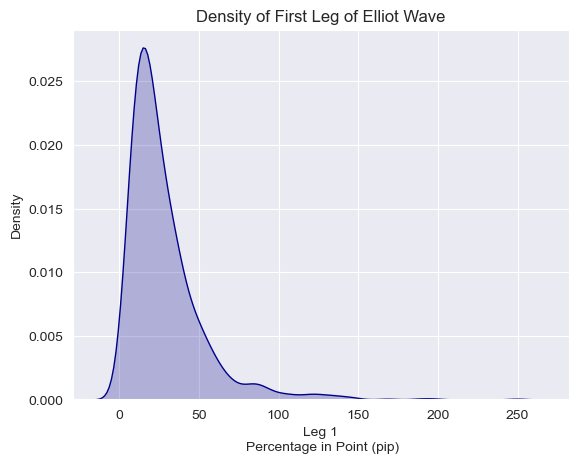

In [6]:
# 1/3 Univariate Plot
sns.set_style("darkgrid")
leg1_density = sns.kdeplot(df_legs['leg1'],  fill = 1, color = "darkblue")
leg1_density.set(xlabel ="Leg 1\n Percentage in Point (pip)", title ="Density of First Leg of Elliot Wave")

Fig.1 \
This is a univariate density plot for Leg 1. This graphic describes the density of Leg 1 in the first leg of an Elliot Wave. It is measured in pips, or percentage in point. We can see that the graph is most dense at around 20 pips meaning that a lot of the points are at or around 20 pips. This is important to know because we need to know at what length is Leg 1 at most of the time.

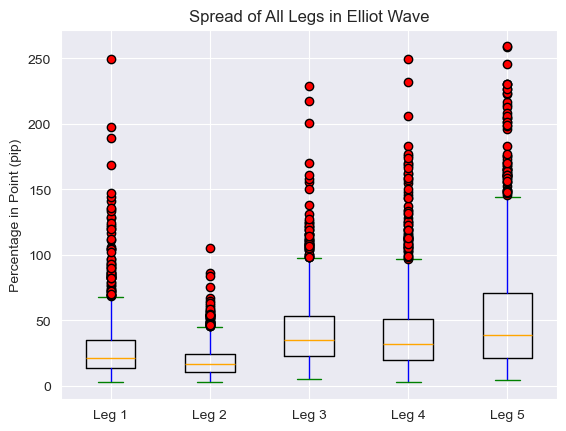

In [8]:
# 2/3 Univariate Plot
df_legs_modified = df_legs.copy()
df_legs_modified.drop(columns = ['id'], inplace = True)
box_plot = plt.boxplot(df_legs_modified, labels = ["Leg 1", "Leg 2", "Leg 3", "Leg 4", "Leg 5"], boxprops=dict(color='blue'), 
                        whiskerprops=dict(color='red'), capprops=dict(color='green'), medianprops=dict(color='orange'), 
                        flierprops=dict(markerfacecolor='red'))

plt.setp(box_plot['boxes'], color='black')
plt.setp(box_plot['whiskers'], color='blue')
plt.title("Spread of All Legs in Elliot Wave")
plt.ylabel("Percentage in Point (pip)")

plt.show()

Fig. 2 \
This is the second univariate plot for all the measurements of the leg variables. We can see that the largest leg is usually Leg 5 but there are many outliers for all the legs. The median of all the legs is less than 50 pips. It is important to see the range of values the leg lengths are in.

[Text(0.5, 25.52222222222222, 'EMA, measured in pips (Percentage in Point)'),
 Text(0.5, 1.0, 'Spread of EMA (Exponential Moving Average)')]

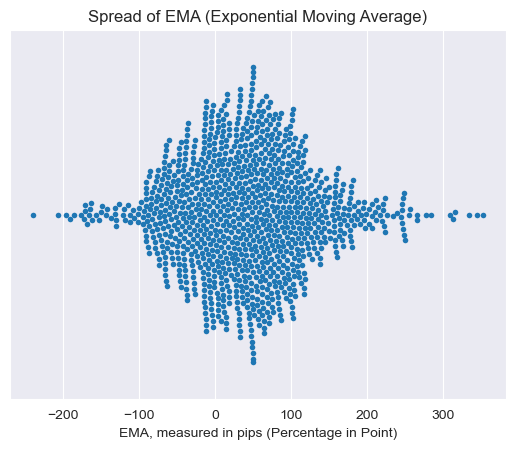

In [10]:
# 3/3 Univariate Plot (how is EMA measured, what units??)
ema_plot = sns.swarmplot(x = df_misc['EMA'], size = 4)
ema_plot.set(xlabel ="EMA, measured in pips (Percentage in Point)", title ="Spread of EMA (Exponential Moving Average)")

Fig. 3 \
It is important to know the distribution of EMA, or Exponential Moving Average, because it shows us the measure of the EMA most of the time, which is crucial when we want to see the difference in prices.

Text(0.5, 0, 'Leg 4 in Elliot Wave (pip)')

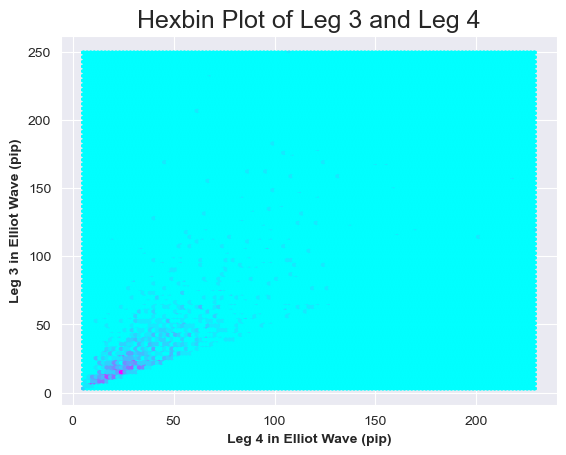

In [12]:
# 1/3 Bivariate Visual
legs_hex = plt.hexbin(df_legs["leg3"], df_legs["leg4"], gridsize = 125, cmap = "cool")
plt.title("Hexbin Plot of Leg 3 and Leg 4", fontsize = 18)
plt.ylabel("Leg 3 in Elliot Wave (pip)", fontweight='bold')
plt.xlabel("Leg 4 in Elliot Wave (pip)", fontweight='bold')

Fig. 4 \
The significance of the hexbin plot is that it clearly shows a strong correlation between the independent variable (leg 3) and the variable being predicted (leg 4). The two variables show a positive slope when graphed below, and through this analysis, informs us that a larger leg 3 will on average yield a larger 4. The objective of this project is to identify trends and variables that can be used to predict leg 4. Here we see a linear relationship between leg 3 and leg 4, and we can now use leg 3 to predict leg 4 in a future model.

[Text(0.5, 0, 'Slope of 1st Leg in Elliot Wave, in Degrees'),
 Text(0, 0.5, 'Slope of 4th Leg in Elliot Wave, in Degrees'),
 Text(0.5, 1.0, 'Slopes of the 1st and 4th Legs in Elliot Wave')]

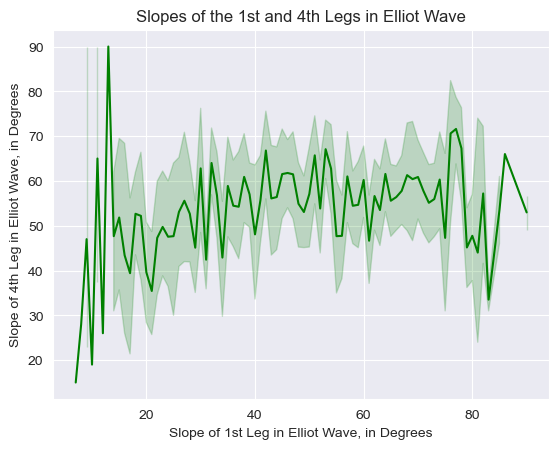

In [14]:
# 2/3 Bivariate Visual (what units is it measured on)
slope_lineplot = sns.lineplot(x = df_slopes['slope1'], y = df_slopes['slope4'], color = "green")
slope_lineplot.set(xlabel ="Slope of 1st Leg in Elliot Wave, in Degrees", ylabel = "Slope of 4th Leg in Elliot Wave, in Degrees", 
                title ="Slopes of the 1st and 4th Legs in Elliot Wave")

Fig. 5 \
It is important to know how the slopes of each leg in the Elliott Wave compare because when we see that the relationship between the two are not linear, so we have to figure out a way that we can relate the two in a different way.

In [ ]:
# 3/3 Bivariate Visual, kde = Kernel Density Estimate, shows pdf of continuous variables
wick_body = sns.jointplot(data = df_misc, x = 'Wick', y = 'Body', kind = 'kde', color = "red", fill = True)
plt.subplots_adjust(top=0.9)
wick_body.set_axis_labels('Wick Length, in pips', 'Body Length, in pips', fontsize=16)
wick_body.fig.suptitle("Comparison of Wick and Body", fontsize=16)

Text(0.5, 0.98, 'Comparison of Wick and Body')

Fig. 6 \
This plot is used to show the Kernel Density estimate when comparing wick length and body length. Using the jointplot from the seaborn package and setting the “kind” to “kde” means that we are able to see the probability distribution function of the two variables. We can see that the function is the most dense around where wick length is about five and body length is about ten. By using this we can see that it is most likely to see this point in the data.

In [ ]:
# 1/2 High Dimensional Visual
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df_misc['Wick']
ys = df_misc['Body']
zs = df_misc['EMA']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = "purple")

ax.set_xlabel('Wick, in pips')
ax.set_ylabel('Body, in pips')
ax.set_zlabel('Price, in USD')
plt.title("3-D Scatterplot Comparing Wick, Body, and Price")

Fig. 7 \
When we look at this graph we can see that most of the points are bunched around the leftmost part of the scatterplot meaning that one variable, Price, might not have as much of an impact on the other two variables, Wick and Body.

In [ ]:
# 2/2 High Dimensional Visual
legs_pairplot = sns.pairplot(df_legs[['leg1','leg2','leg3','leg4', 'leg5']])
plt.subplots_adjust(top=0.95)
legs_pairplot.fig.suptitle("Pairplot of the Legs in the Elliot Wave", fontsize = 20)

Fig. 8 \
This pairplot compares all the legs in the Elliot wave to each other and we can see that for most of the scatter plots there is an upwards trend for the points, so we know that as the length in each leg increases it is likely that the other legs will increase as well.

In [ ]:
# 1/2 Charts that describe issues within data
sns.clustermap(df_slopes[['slope1', 'slope2', 'slope3', 'slope4']], z_score=0, cmap="mako", center=0)
plt.title("Cluster Map of The Slopes in the Elliot Wave")

Fig. 9 \
This is a clustermap showing the relationship between all the slopes, the color represents how similar each value is for each variable, and it groups clusters with similar values together. Because the dataset is so big we have a lot of clusters, but we can still see that each slope has different values at which they are most similar to others.

In [ ]:
# 2/2 Charts that describe issues within data
slope_heatmap = (df_slopes.loc[:, ['slope1', 'slope2', 'slope3', 'slope4']]).corr()
sns.heatmap(slope_heatmap, annot=True)
plt.title("Heatmap of the Variance of the Slopes of the Elliot Wave")

In [ ]:
# 2/2 Charts that describe issues within data
legs_heatmap = (df_legs.loc[:, ['leg1', 'leg2', 'leg3', 'leg4', 'leg5']]).corr()
sns.heatmap(legs_heatmap, annot=True)
plt.title("Heatmap of the Variance of the Legs of the Elliot Wave")

In [ ]:
# 2/2 Charts that describe issues within data
misc_heatmap = (df_misc.loc[:, ['Price', 'EMA', 'Wick', 'Body']]).corr()
sns.heatmap(misc_heatmap, annot=True)
plt.title("Heatmap of the Variance of the Slopes of the Elliot Wave")

Fig. 10.1, Fig. 10.2, Fig. 10.3 \
For this I did a correlation heat map for each dataset that we have. One dataset has the length of the legs, the second one has the degrees of the slope, and the last one has miscellaneous variables. The data with the highest correlation is the legs data while the other two datasets have very low variance. This implies that while the legs might have a linear relationship with each other, it is not likely that the slopes or the miscellaneous variables have a linear relationship with each other.



4) Data Exploration Techniques: 

Data Exploration is how you use visualization and transformation to explore the data in a systematic way. It involves a three-step cycle of the following: 1. Generate questions about your data; 2. Search for answers by visualizing, transforming, and modeling your data; 3. Use what you learn to refine your questions and/or generate new questions. Below I will explain the purpose, the technique, and the relevance of the three data exploration techniques. 
 
Trend Analysis:
The purpose for trend analysis is that it helps to identify long term patterns or directions in the data over time. For predicting leg 4 of the EUROUSD currency pair, trend analysis is vital to capture the underlying movement in the data, which is driven by some or all the technical and fundamental variables, such as legs, slopes, EMA, and miscellaneous variables. Understanding these trends can produce more accurate predictions of leg 4. For technique, I will break the data into four sections, January-March, April-June, July-September, October-December. From there, I will plot the distribution of the predictive variable (leg4) and observe if the distribution changes throughout the seasons. Means, medians, and variance will also be measured and compared across the four divided sections. Regarding relevance, understanding the seasonal trend in EUROUSD is critical for predicting leg 4. If the data shows variation between seasons, it could significantly influence the outcome of the predictive model. Trends help set a baseline for predictions, especially when combined with other factors like slopes and miscellaneous variables. 
 
Regression Analysis:
The purpose of regression analysis is to help quantify the relationship between leg 4 and the other variables. It enables identification of which variables have significant predictive prowess, whereby a model can be constructed to predict leg 4, based on these variables. For technique, we will use multiple linear regression models, incorporating all variables from the Legs, Slopes, and Miscellaneous datasets. R squared will be used to determine the most significant predictors, which will then be incorporated into the model, and the metrics for model performance will be the classic Mean Squared Error (MSE). Regarding relevance, the regression analysis is crucial for predicting leg 4 because it not only highlights the strength of relationships between the variables, but also provides an objective mathematical model that can be used to make predictions.
 
Correlation Analysis: 
The purpose of correlation analysis is to identify the strength and the direction of our linear relationships between leg 4 and the other variables. Understanding these correlations is useful in understanding the data structure and in selecting the proper variables to be used as model features. The technique that will be used is Pearson’s correlation coefficients. A correlation will be calculated for all other variables in the dataset besides the variable being predicted (leg 4).  From here, a heatmap of correlation matrix will be constructed to visualize the relationships. The variables with high positive or negative correlations will be deemed significant. Regarding relevance, identifying variables that are highly correlated with leg 4 and only using those will improve the accuracy of our predictions. Secondly, it will help to detect issues of multicollinearity among the predictors. 


 5) Conclusion: By integrating these data exploration techniques, we aim to build a comprehensive model for predicting Leg 4 of the EUROUSD currency pair. Trend analysis will help identify any seasonal patterns, regression analysis will model the relationships between Leg 4 and other variables, and correlation analysis will assist in identifying key predictors. Together, these methods will provide valuable insights and enhance the predictive accuracy of the model.